<a href="https://colab.research.google.com/github/vamvieira/Aulas_Senai/blob/main/Analise_Preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##\\dsn1121288054\FIC\Prof Joao_Paulo\__Data Science - 2505\datasets

#Análise Preditiva

##Regressão Linear:

uma empresa está interessa da em verificar se a remuneração dos seus colaboradores está de acordo com as políticas vigentes. Para isso coletou uma amostra de 46 colaboradores.

_Pergunta de Negócio_: O salário muda de acordo com os anos de educação superior? Se sim, é possivel consruir um modelo que estime o salário de acorodo com esses anos?

In [2]:
#Pacotes de Manipulação de Dados
import numpy as np
import pandas as pd

#Pacotes Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes de Modelagem
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/content/base_funcionarios_v1.csv', sep=';', index_col='id')
df.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [4]:
df.columns

Index(['Salario', 'Anos_Educ_Superior'], dtype='object')

In [5]:
columns = ['salario', 'anos_educ_superios']
df.columns = columns

In [6]:
df.columns

Index(['salario', 'anos_educ_superios'], dtype='object')

In [7]:
df.head()

,salario,anos_educ_superios
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


Complementando - Análise Exploratória

<Axes: xlabel='anos_educ_superios', ylabel='salario'>

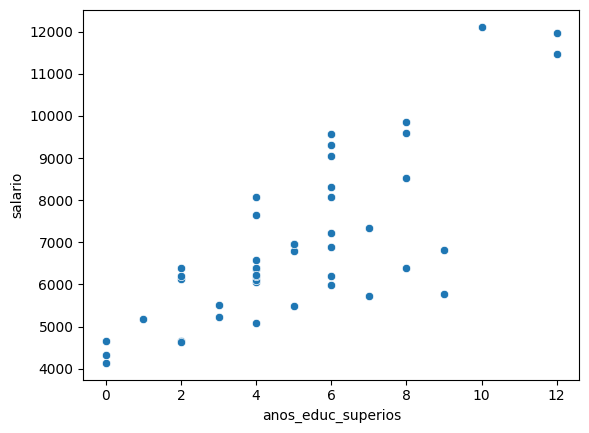

In [8]:
#Gráfico de Dispersão
sns.scatterplot(x=df['anos_educ_superios'], y=df['salario'])

In [9]:
#Correlação Linear de Pearson = Compara duas variaveis e como podem impactar
#exemplo, vendo sorvete e chocolate quente, determinada data do ano se faz muito frio as vendas de chocolate vendem mais comparado ao sorvete e no calor o contrários, a correlação mede de -1 a 1
#mostrando se no frio o grafico crescerá positivamente ou negativamente.
df.corr()

,salario,anos_educ_superios
salario,1.000000,0.776992
anos_educ_superios,0.776992,1.000000


<Axes: >

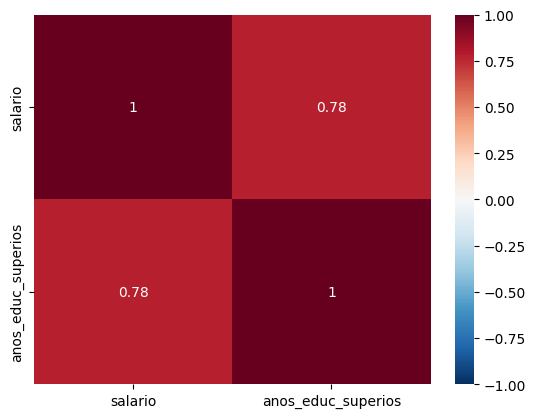

In [10]:
#Gráfico HeatMap
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1,vmax=1)

In [11]:
y = df['salario']

df['intercepto'] = 1
x = df[['intercepto','anos_educ_superios']]

In [12]:
#Ajuste do modelo
modelo = sm.OLS(y,x)
resultado = modelo.fit()

In [13]:
#Resultado do ajuste do modelo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.18e-10
Time:                        19:53:34   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4301.7990    372

<Axes: xlabel='anos_educ_superios', ylabel='salario'>

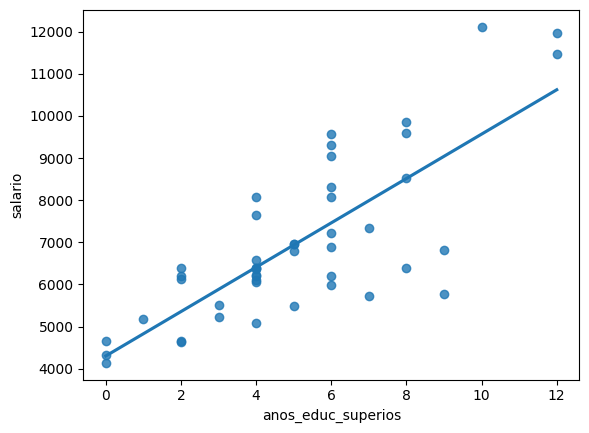

In [14]:
sns.regplot(x=df['anos_educ_superios'], y=df['salario'], ci=None)

In [38]:
#Desafio, descubra o tempo de empresa da segunda base
df2 = pd.read_csv('/content/base_funcionarios_v2.csv', sep=';', index_col='id')

In [39]:
df2.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [47]:
df2.columns

Index(['Salario', 'Anos_Educ_Superior', 'Tempo_Empresa'], dtype='object')

In [50]:
columns = ['salario','anos_educ_superior','tempo_empresa']

In [51]:
df2.columns = columns

In [52]:
df2.head()

,salario,anos_educ_superior,tempo_empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


<Axes: xlabel='tempo_empresa', ylabel='salario'>

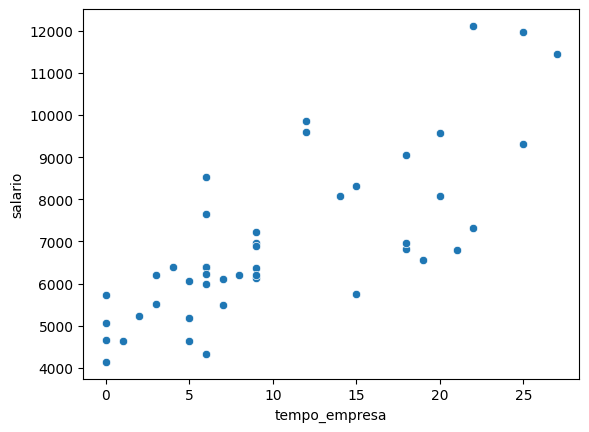

In [53]:
sns.scatterplot(x=df2['tempo_empresa'], y=df2['salario'])

In [54]:
df2.corr()

,salario,anos_educ_superior,tempo_empresa
salario,1.000000,0.776992,0.765173
anos_educ_superior,0.776992,1.000000,0.607486
tempo_empresa,0.765173,0.607486,1.000000


<Axes: >

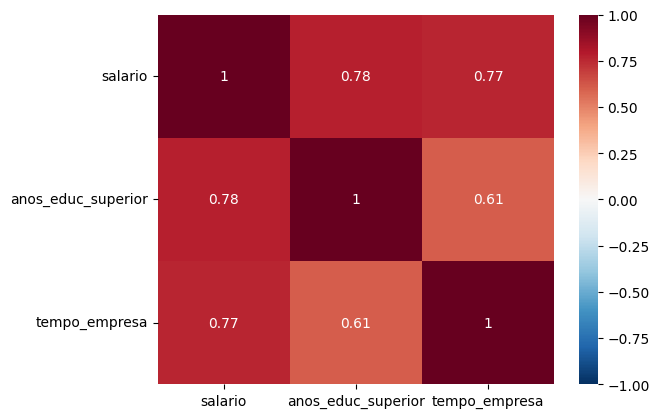

In [55]:
sns.heatmap(df2.corr(), cmap='RdBu_r', annot=True, vmin=-1,vmax=1)

In [59]:
y = df2['salario']

df2['intercepto'] = 1
x = df2[['intercepto','anos_educ_superior','tempo_empresa']]

In [60]:
#Ajuste do modelo
modelo = sm.OLS(y,x)
resultado = modelo.fit()

In [61]:
#Resultado do ajuste do modelo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.66e-13
Time:                        20:24:29   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309